# Secondary Dataset Analytics

   Eating healthy is fast becoming a preferred lifestyle and IntelliMed is keen to tap into this emerging market. To find out public opinions and discussions related to healthy eating habits. An effective means of doing this is to analyse tweets containing discussions related to healthy eating and lifestyle factors. Analysis focused on topics, themes, sentiment and emotions. Based on the analysis present insights and recommendations for any actions for IntelliMed in entering this new market.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Secondary_Dataset.csv')
df.head()

,Datetime,Tweet Id,Text,Username
0,2022-01-30 22:41:15,1487918860393402371,a late breakfast! \n\n#simple #easy #health #i...,A1N10M_Logging
1,2022-01-30 22:37:20,1487917876778520576,CHICKEN LETTUCE WRAPS #shorts #ytshorts #healt...,nazmulmarketer1
2,2022-01-30 20:22:10,1487883861564477441,#health #humor #food https://t.co/vtfVV1aySD,vanillaspice82
3,2022-01-30 20:01:00,1487878532625625089,"Zone Diet Balanced Meal (40% carb, 30% , 30% p...",ZHealthyEating
4,2022-01-30 19:15:19,1487867035732393984,Experts say these are the top types of #food y...,personalfitnes3


In [3]:
df.shape

(46495, 4)

### Data Preprocessing

In [3]:
df.isnull().sum()

Datetime    0
Tweet Id    0
Text        0
Username    0
dtype: int64

<AxesSubplot:>

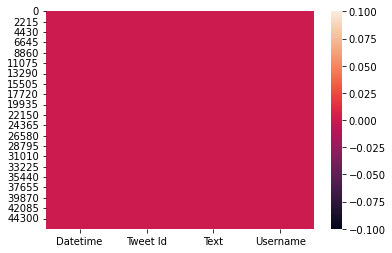

In [168]:
sns.heatmap(df.isnull())

In [6]:
df.dtypes

Datetime    object
Tweet Id     int64
Text        object
Username    object
dtype: object

In [4]:
df1 = df.copy()

#### Cleaning Text Column
- Removing links, mentions, hashtags, newline tags, and whitespaces

In [6]:
import re
# define function to preprocess the text
def preprocess_text(text):
    # remove URLs
    text = re.sub(r'http\S+', '', text)
    # remove hashtags and mentions
    text = re.sub(r'#\w+|\@\w+', '', text)
    # remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    # convert to lowercase
    text = text.lower()
    # remove stop words and perform stemming or lemmatization
    # add your code here
    return text

# apply the preprocess_text function to the 'Text' column
df1['Text'] = df1['Text'].apply(preprocess_text)

In [7]:
df1['Text'] = df1['Text'].apply(lambda x: x.strip())
mask = (df1['Text'] == '') | (df1['Text'].str.isspace())

# Drop the rows that meet the mask criteria
df1 = df1[~mask]

In [8]:
df1.drop_duplicates(subset='Text', keep='first', inplace=True)

In [9]:
df1.head()

,Datetime,Tweet Id,Text,Username
0,2022-01-30 22:41:15,1487918860393402371,a late breakfast,A1N10M_Logging
1,2022-01-30 22:37:20,1487917876778520576,chicken lettuce wraps,nazmulmarketer1
3,2022-01-30 20:01:00,1487878532625625089,zone diet balanced meal 40 carb 30 30 protein...,ZHealthyEating
4,2022-01-30 19:15:19,1487867035732393984,experts say these are the top types of you sh...,personalfitnes3
5,2022-01-30 19:13:56,1487866689299570699,the winter can be a hard time for our bodies f...,BeeVitalUK


In [10]:
df1.shape

(29565, 4)

In [130]:
df1.isna().sum()

Datetime    0
Tweet Id    0
Text        0
Username    0
dtype: int64

In [131]:
print("Total number of tweets:", len(df1))

Total number of tweets: 29565


In [22]:
df3.to_csv('cleaned_dataset_2.csv', index = False)

In [12]:
# Count the number of tweets per user
tweets_per_user = df1.groupby('Username')['Tweet Id'].count().reset_index()
tweets_per_user.columns = ['Username', 'tweet_count']

# Print the top 10 users with the highest number of tweets
top_users = tweets_per_user.sort_values(by='tweet_count', ascending=False).head(10)
print("\nTop 10 users by tweet count:\n", top_users)


Top 10 users by tweet count:
               Username  tweet_count
8465    healthytasting          470
8445   healthstepsonly          326
2274      FoodieNewsie          313
3543          LAMuscle          306
1563   DelilahVeronese          207
5713     StayHealthy07          197
11028        veganrick          146
5889        TV9Marathi          145
751       Beinggfoodie          138
9931         pickyfork          126


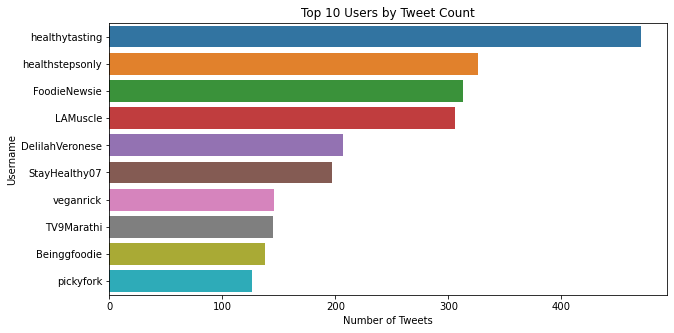

In [13]:
# Plot the top 10 users by tweet count
plt.figure(figsize=(10, 5), facecolor=None)
sns.barplot(x='tweet_count', y='Username', data=top_users)
plt.title('Top 10 Users by Tweet Count')
plt.xlabel('Number of Tweets')
plt.ylabel('Username')
plt.show()

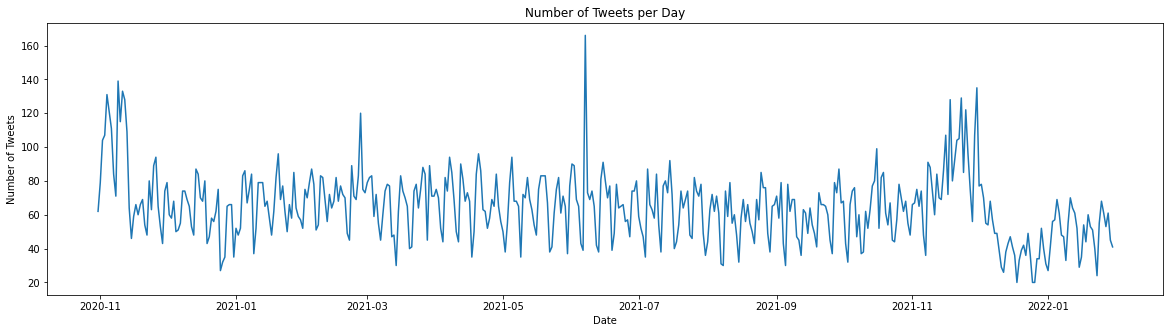

In [134]:
# Plot the number of tweets per day
plt.figure(figsize=(20, 5), facecolor=None)
df1['Datetime'] = pd.to_datetime(df1['Datetime'])
df1['date'] = df1['Datetime'].dt.date
tweets_per_day = df1.groupby('date')['Tweet Id'].count().reset_index()
plt.plot(tweets_per_day['date'], tweets_per_day['Tweet Id'])
plt.title('Number of Tweets per Day')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

In [14]:
df2 = df1.copy()

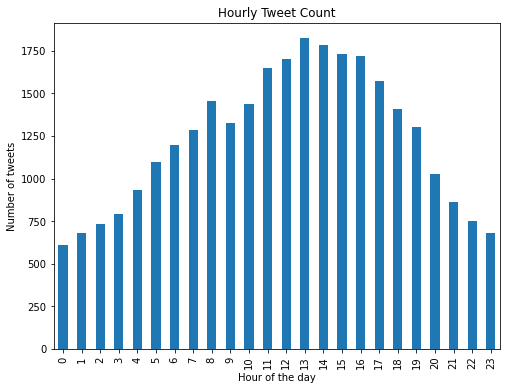

The hour with the maximum number of tweets is 13:00


In [15]:
# Convert the 'datetime' column to a datetime object
df2['Datetime'] = pd.to_datetime(df2['Datetime'])

# Extract the hour from the 'datetime' column and add it as a new column
df2['hour'] = df2['Datetime'].dt.hour

# Group the tweets by hour and count the number of tweets in each group
hourly_tweet_count = df2.groupby('hour')['Tweet Id'].count()

# Find the hour with the maximum number of tweets
max_tweet_hour = hourly_tweet_count.idxmax()

# Plot a bar chart of hourly tweet count
hourly_tweet_count.plot(kind='bar', figsize=(8,6))
plt.title('Hourly Tweet Count')
plt.xlabel('Hour of the day')
plt.ylabel('Number of tweets')
plt.show()

# Print the hour with the maximum number of tweets
print(f"The hour with the maximum number of tweets is {max_tweet_hour}:00")


In [137]:
df2.drop(['date', 'hour'], inplace = True, axis= 1)
# df2.head()

#### Theme Analysis with Word Cloud
- Theme analysis with word cloud of health tweets can provide a quick and visually appealing way to identify the most common themes and topics discussed in a large volume of tweets related to health. Word clouds can give an idea about the overall sentiment and tone of the tweets, as well as highlight the most frequently used words and their relative importance. 

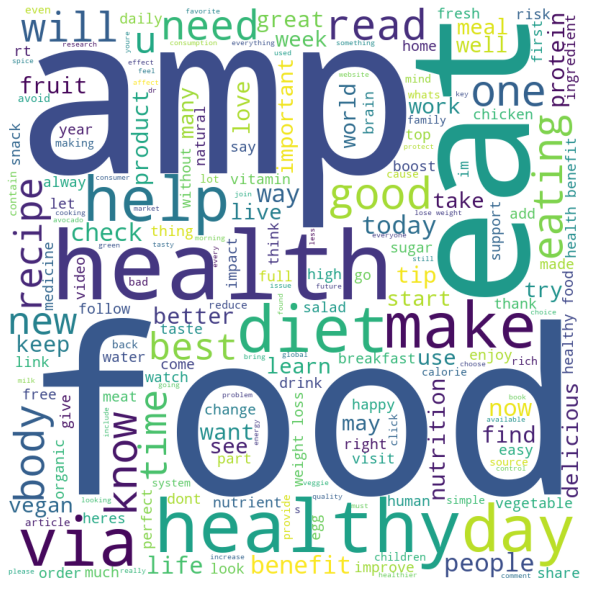

In [138]:
from wordcloud import WordCloud

# Concatenate all the tweets into a single string
all_tweets = ' '.join(df2['Text'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(all_tweets)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

- Insight shows that tweet text related to Healthcare, Eating, Lifestyle Habits.
- Vertical words are typically the ones that appear more frequently within a specific topic or group of texts.
- Horizontal words are often less frequent and may represent secondary or supporting ideas within the topic. 
- Size of the words can represent their significance in the context of the health-related discussion.

### Topic Modelling
- Topic modeling of health related tweets can provide insights into the most prevalent health concerns and discussions on social media, which can help healthcare professionals and organizations better understand public health needs and design more effective communication and intervention strategies.

##### Applying Latent Dirichlet Allocation (LDA) Model


In [139]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models

# Load stopwords and lemmatizer
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('omw-1.4')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Load tweets data
tweets = df2['Text']  # Replace with your tweets data

# Text preprocessing
processed_tweets = []
for tweet in tweets:
    # Convert to lowercase
    tweet = tweet.lower()
    # Tokenize
    tokens = nltk.word_tokenize(tweet)
    # Remove stopwords and non-alphabetic tokens
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    # Lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Add processed tweet to list
    processed_tweets.append(tokens)

# Create dictionary and corpus
dictionary = corpora.Dictionary(processed_tweets)
corpus = [dictionary.doc2bow(tweet) for tweet in processed_tweets]

# Train topic model
num_topics = 10  # Set number of topics
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Print top words for each topic
for topic_id in range(num_topics):
    top_words = lda_model.print_topic(topic_id)
    top_words = ' '.join(word.split('*')[1].strip().replace('"', '') for word in top_words.split(' + '))
    print(f"Topic {topic_id}: {top_words}")

# Get topic distribution for each tweet
tweet_topics = []
for tweet in processed_tweets:
    topic_dist = lda_model[dictionary.doc2bow(tweet)]
    topic_dist = sorted(topic_dist, key=lambda x: x[1], reverse=True)
    tweet_topics.append(topic_dist[0][0])


Topic 0: oil milk green rice benefit recipe potato salad क cheese
Topic 1: weight rt loss join amp lose u free help tip
Topic 2: food healthy eat diet eating make know u good get
Topic 3: recipe easy amp try keto week chicken delicious morning great
Topic 4: day fruit happy healthy love meal amp vegetable seed recipe
Topic 5: help food body amp vitamin protein high sugar diet source
Topic 6: food amp health risk disease may study use impact heart
Topic 7: food medicine u child let online get store answer take
Topic 8: one food see eat amp time much eating water every
Topic 9: food health new market benefit amp live industry news world


##### Evaluation of LDA Model

Coherence score: -4.984346698241289


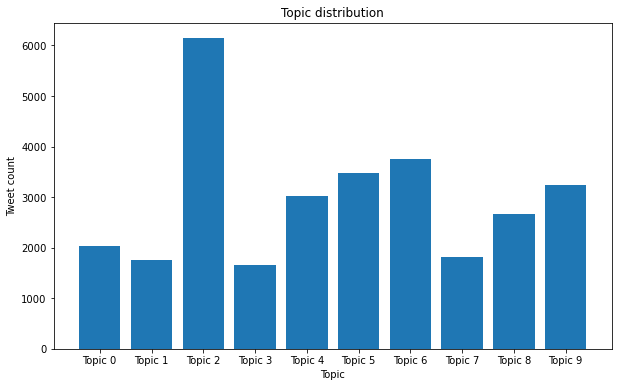

In [140]:
from gensim.models import CoherenceModel

# Get coherence score for the trained LDA model
coherence_score = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass').get_coherence()

# Print coherence score
print(f"Coherence score: {coherence_score}")

# Plot topic distribution
fig, ax = plt.subplots(figsize=(10, 6))
topic_distribution = np.array(tweet_topics)
topic_counts = np.bincount(topic_distribution)
ax.bar(range(num_topics), topic_counts, align='center')
ax.set_xticks(range(num_topics))
ax.set_xticklabels([f"Topic {i}" for i in range(num_topics)])
ax.set_xlabel('Topic')
ax.set_ylabel('Tweet count')
ax.set_title('Topic distribution')
plt.show()


- Insight shows that topic 2 has major tweets counts.

##### Word Cloud for 10 Topics Generated

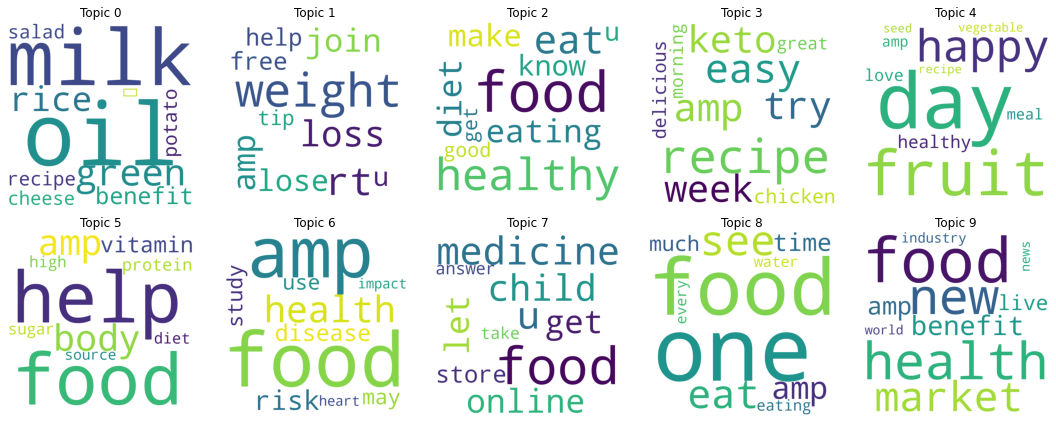

In [141]:
# Plot wordcloud for each topic
from wordcloud import WordCloud

fig, axes = plt.subplots(2, 5, figsize=(15, 6), sharex=True, sharey=True)

# Generate and plot wordcloud for each topic
for i, ax in enumerate(axes.flatten()):
    topic_id = i
    wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=20, contour_width=3, contour_color='steelblue')
    words = dict(lda_model.show_topic(topic_id))
    wordcloud.generate_from_frequencies(words)
    ax.imshow(wordcloud)
    ax.axis("off")
    ax.set_title(f"Topic {topic_id}")

plt.tight_layout()
plt.show()

In [142]:
df2.head()

,Datetime,Tweet Id,Text,Username
0,2022-01-30 22:41:15,1487918860393402371,a late breakfast,A1N10M_Logging
1,2022-01-30 22:37:20,1487917876778520576,chicken lettuce wraps,nazmulmarketer1
3,2022-01-30 20:01:00,1487878532625625089,zone diet balanced meal 40 carb 30 30 protein...,ZHealthyEating
4,2022-01-30 19:15:19,1487867035732393984,experts say these are the top types of you sh...,personalfitnes3
5,2022-01-30 19:13:56,1487866689299570699,the winter can be a hard time for our bodies f...,BeeVitalUK


### Sentiment Analysis
- Sentiment analysis of health tweets can provide valuable insights into the public's opinions and emotions towards healthcare-related issues, which can be used to inform decision-making processes in healthcare policy, improve patient care, and enhance public health communication.

In [16]:
df3 = df2.copy()

- As in dataset, tweets sentiments are not labeled. So, labeling tweet text sentiment with 0 and 1.
##### Using Natural Language Toolkit Sentiment Intesity Analyzer 

In [17]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# perform sentiment analysis using VADER
sia = SentimentIntensityAnalyzer()
df3['Sentiment'] = df3['Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# print the sentiment scores
print(df3['Sentiment'])


0        0.0000
1        0.0000
3        0.2500
4        0.8176
5        0.7351
          ...  
46483    0.0000
46485   -0.2732
46489    0.4404
46490    0.7003
46494    0.7506
Name: Sentiment, Length: 29565, dtype: float64


In [18]:
df3['label'] = df3['Sentiment'].apply(lambda x: 1 if x > 0 else 0)

In [146]:
df3['label'].value_counts()

1    16765
0    12800
Name: label, dtype: int64

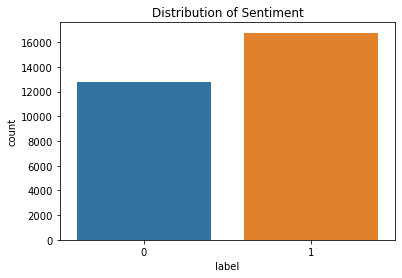

In [147]:
# Plot the distribution of sentiment
sns.countplot(x='label', data=df3)
plt.title('Distribution of Sentiment')
plt.show()

- Extracting the keyword from tweet texts using Yake 
- YAKE! is a light-weight unsupervised automatic keyword extraction method which rests on text statistical features extracted from single documents to select the most important keywords of a text.
##### Applying Yet Another Keyword Extractor (Yake)

###### Creating Unigram Keyword

In [19]:
import yake

# Specify language for Yake
language = "en"

# Create Yake object
kw_extractor = yake.KeywordExtractor(lan=language, n=1, top=1, dedupLim=0.8, dedupFunc='seqm')

# Extract keywords from text
df3['keyword_1'] = df3['Text'].apply(lambda x: kw_extractor.extract_keywords(x) if x else [])

# Get the most prominent keyword from the list or assign an empty string if the list is empty
df3['keyword_1'] = df3['keyword_1'].apply(lambda x: x[0][0] if x else "")

In [149]:
df3.head()

,Datetime,Tweet Id,Text,Username,Sentiment,label,keyword_1
0,2022-01-30 22:41:15,1487918860393402371,a late breakfast,A1N10M_Logging,0.0000,0,breakfast
1,2022-01-30 22:37:20,1487917876778520576,chicken lettuce wraps,nazmulmarketer1,0.0000,0,chicken
3,2022-01-30 20:01:00,1487878532625625089,zone diet balanced meal 40 carb 30 30 protein...,ZHealthyEating,0.2500,1,carb
4,2022-01-30 19:15:19,1487867035732393984,experts say these are the top types of you sh...,personalfitnes3,0.8176,1,experts
5,2022-01-30 19:13:56,1487866689299570699,the winter can be a hard time for our bodies f...,BeeVitalUK,0.7351,1,system


###### Creating Bigram Keyword

In [20]:
kw_extractor = yake.KeywordExtractor(lan=language, n=2, top=1, dedupLim=0.8, dedupFunc='seqm')

# Extract keywords from text
df3['keyword_2'] = df3['Text'].apply(lambda x: kw_extractor.extract_keywords(x) if x else [])

# Get the most prominent keyword from the list or assign an empty string if the list is empty
df3['keyword_2'] = df3['keyword_2'].apply(lambda x: x[0][0] if x else "")

In [153]:
df3.head()

,Datetime,Tweet Id,Text,Username,Sentiment,label,keyword_1,keyword_2
0,2022-01-30 22:41:15,1487918860393402371,a late breakfast,A1N10M_Logging,0.0000,0,breakfast,late breakfast
1,2022-01-30 22:37:20,1487917876778520576,chicken lettuce wraps,nazmulmarketer1,0.0000,0,chicken,chicken lettuce
3,2022-01-30 20:01:00,1487878532625625089,zone diet balanced meal 40 carb 30 30 protein...,ZHealthyEating,0.2500,1,carb,zone diet
4,2022-01-30 19:15:19,1487867035732393984,experts say these are the top types of you sh...,personalfitnes3,0.8176,1,experts,share follow
5,2022-01-30 19:13:56,1487866689299570699,the winter can be a hard time for our bodies f...,BeeVitalUK,0.7351,1,system,immune system


###### Creating Trigram Keyword

In [21]:
kw_extractor = yake.KeywordExtractor(lan=language, n=3, top=1, dedupLim=0.8, dedupFunc='seqm')

# Extract keywords from text
df3['keyword_3'] = df3['Text'].apply(lambda x: kw_extractor.extract_keywords(x) if x else [])

# Get the most prominent keyword from the list or assign an empty string if the list is empty
df3['keyword_3'] = df3['keyword_3'].apply(lambda x: x[0][0] if x else "")

In [155]:
df3.head()

,Datetime,Tweet Id,Text,Username,Sentiment,label,keyword_1,keyword_2,keyword_3
0,2022-01-30 22:41:15,1487918860393402371,a late breakfast,A1N10M_Logging,0.0000,0,breakfast,late breakfast,late breakfast
1,2022-01-30 22:37:20,1487917876778520576,chicken lettuce wraps,nazmulmarketer1,0.0000,0,chicken,chicken lettuce,chicken lettuce wraps
3,2022-01-30 20:01:00,1487878532625625089,zone diet balanced meal 40 carb 30 30 protein...,ZHealthyEating,0.2500,1,carb,zone diet,zone diet balanced
4,2022-01-30 19:15:19,1487867035732393984,experts say these are the top types of you sh...,personalfitnes3,0.8176,1,experts,share follow,share follow
5,2022-01-30 19:13:56,1487866689299570699,the winter can be a hard time for our bodies f...,BeeVitalUK,0.7351,1,system,immune system,immune system


##### Distribution of Keywords by Target Labels

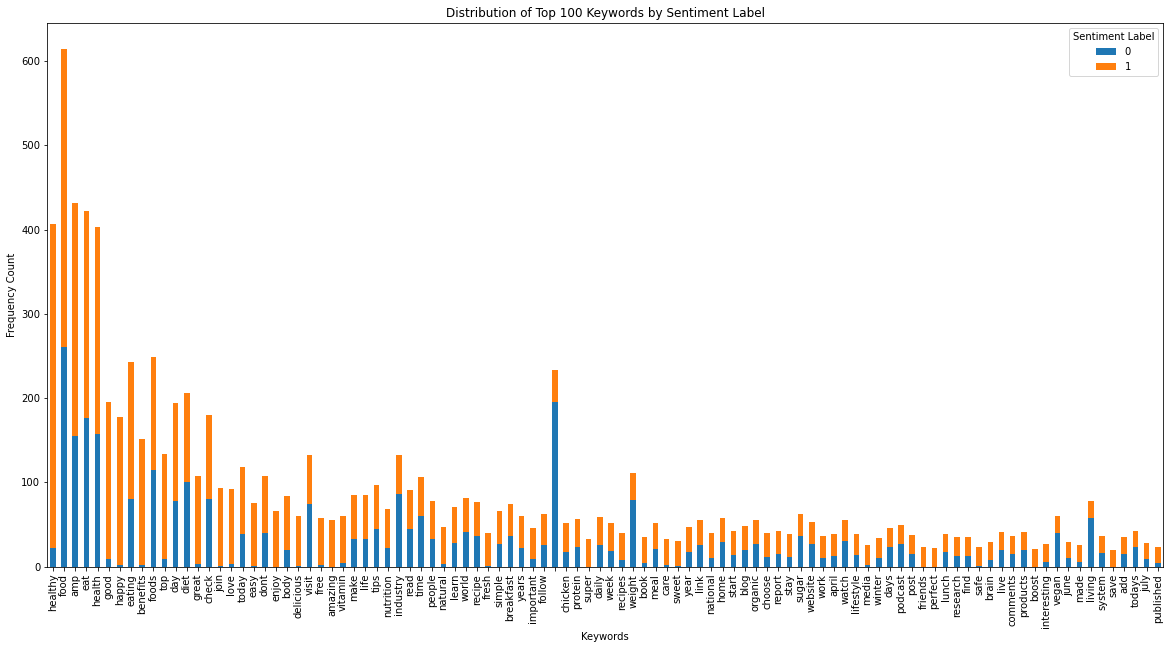

In [156]:
# create a pivot table to count the frequency of each keyword for each sentiment label
pivot_table = pd.pivot_table(df3, index="keyword_1", columns="label", aggfunc="size", fill_value=0)

# sort the pivot table by the total count of each keyword
sorted_pivot_table = pivot_table.sort_values(by=(0+1), ascending=False)

# extract the top 100 keywords by total count
top_keywords = sorted_pivot_table.index[:100]

# extract the frequency counts for the top keywords
top_keyword_counts = sorted_pivot_table.loc[top_keywords]

fig, ax = plt.subplots(figsize=(20, 10))
top_keyword_counts.plot(kind="bar", stacked=True, ax=ax, rot=90)
ax.set_title("Distribution of Top 100 Keywords by Sentiment Label")
ax.set_xlabel("Keywords")
ax.set_ylabel("Frequency Count")
ax.legend(title="Sentiment Label", labels=["0", "1"])
plt.show()

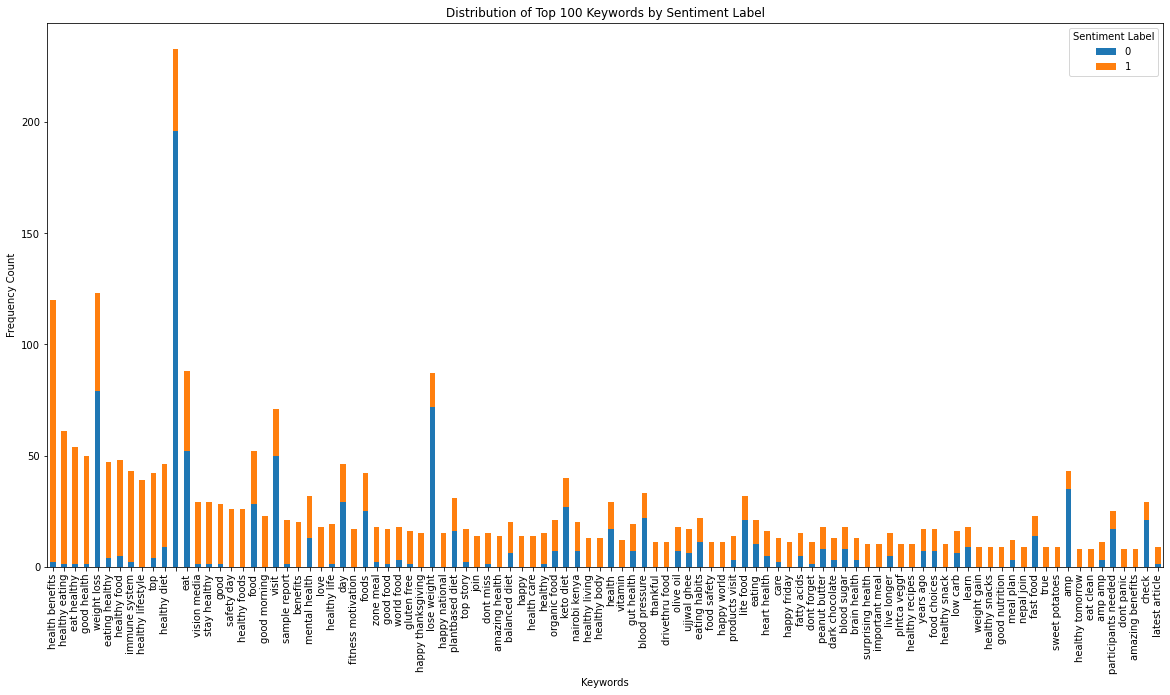

In [157]:
# create a pivot table to count the frequency of each keyword for each sentiment label
pivot_table = pd.pivot_table(df3, index="keyword_2", columns="label", aggfunc="size", fill_value=0)

# sort the pivot table by the total count of each keyword
sorted_pivot_table = pivot_table.sort_values(by=(0+1), ascending=False)

# extract the top 100 keywords by total count
top_keywords = sorted_pivot_table.index[:100]

# extract the frequency counts for the top keywords
top_keyword_counts = sorted_pivot_table.loc[top_keywords]

fig, ax = plt.subplots(figsize=(20, 10))
top_keyword_counts.plot(kind="bar", stacked=True, ax=ax, rot=90)
ax.set_title("Distribution of Top 100 Keywords by Sentiment Label")
ax.set_xlabel("Keywords")
ax.set_ylabel("Frequency Count")
ax.legend(title="Sentiment Label", labels=["0", "1"])
plt.show()

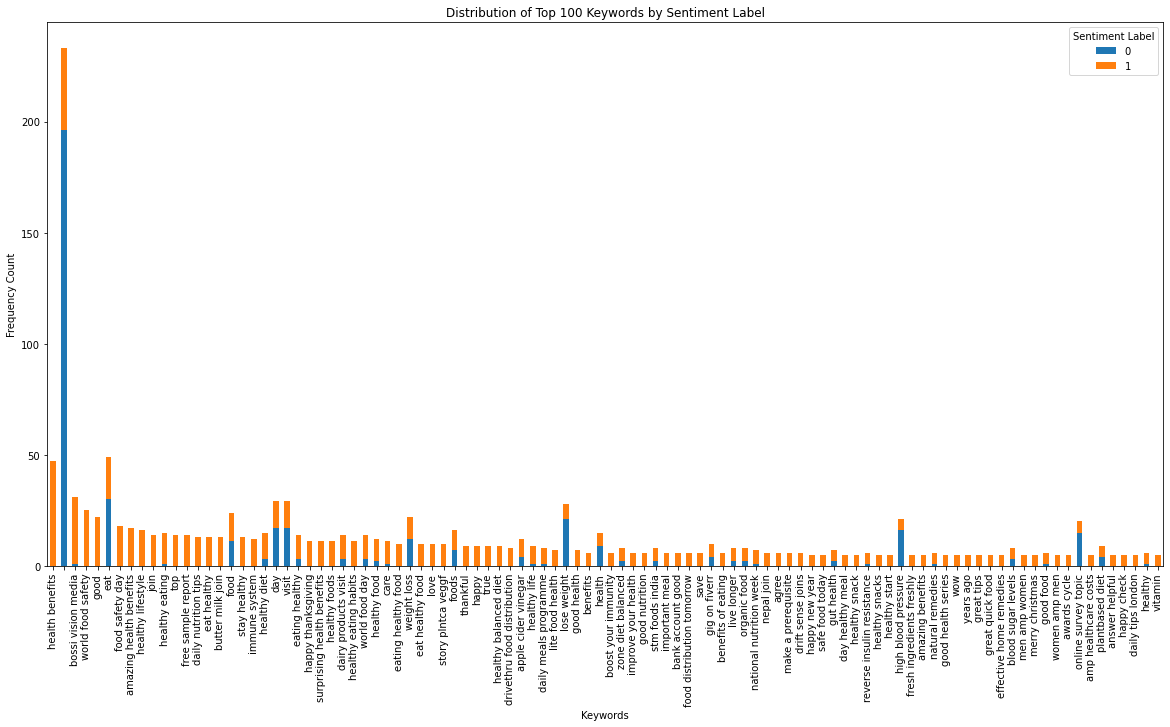

In [158]:
# create a pivot table to count the frequency of each keyword for each sentiment label
pivot_table = pd.pivot_table(df3, index="keyword_3", columns="label", aggfunc="size", fill_value=0)

# sort the pivot table by the total count of each keyword
sorted_pivot_table = pivot_table.sort_values(by=(0+1), ascending=False)

# extract the top 100 keywords by total count
top_keywords = sorted_pivot_table.index[:100]

# extract the frequency counts for the top keywords
top_keyword_counts = sorted_pivot_table.loc[top_keywords]

fig, ax = plt.subplots(figsize=(20, 10))
top_keyword_counts.plot(kind="bar", stacked=True, ax=ax, rot=90)
ax.set_title("Distribution of Top 100 Keywords by Sentiment Label")
ax.set_xlabel("Keywords")
ax.set_ylabel("Frequency Count")
ax.legend(title="Sentiment Label", labels=["0", "1"])
plt.show()

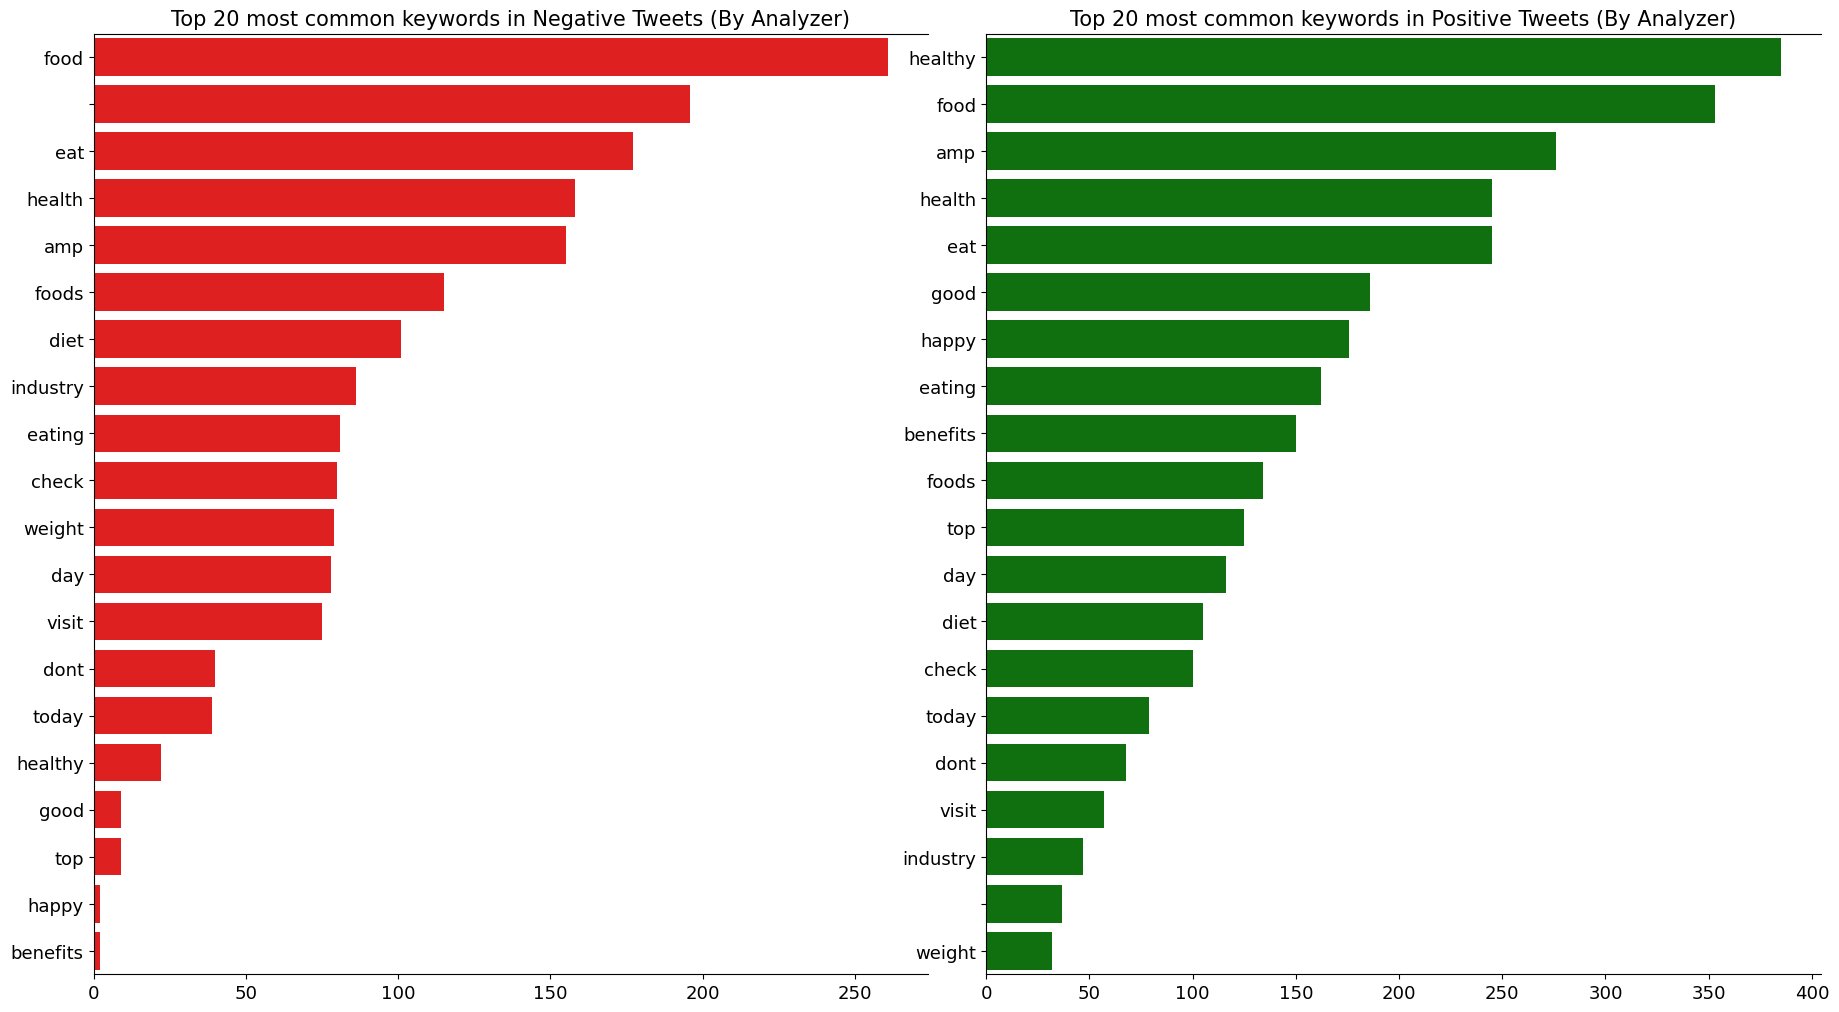

In [160]:
N = 20
top_keywords = df3['keyword_1'].value_counts()[:N].index.tolist()

label_1 = df3[df3['label'] == 1]['keyword_1'].value_counts()
label_1 = label_1[label_1.index.isin(top_keywords)]
label_1_unigrams = pd.DataFrame({'keyword_1': label_1.index, 'count':label_1.values})

label_0 = df3[df3['label'] == 0]['keyword_1'].value_counts()
label_0 = label_0[label_0.index.isin(top_keywords)]
label_0_unigrams = pd.DataFrame({'keyword_1': label_0.index, 'count': label_0.values})

fig, axes = plt.subplots(ncols=2, figsize=(18, 10), dpi=100)
plt.tight_layout()

sns.barplot(y=label_0_unigrams['keyword_1'], x=label_0_unigrams['count'], ax=axes[0], color='red')
sns.barplot(y=label_1_unigrams['keyword_1'], x=label_1_unigrams['count'], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common keywords in Negative Tweets (By Analyzer)', fontsize=15)
axes[1].set_title(f'Top {N} most common keywords in Positive Tweets (By Analyzer)', fontsize=15)

plt.show()


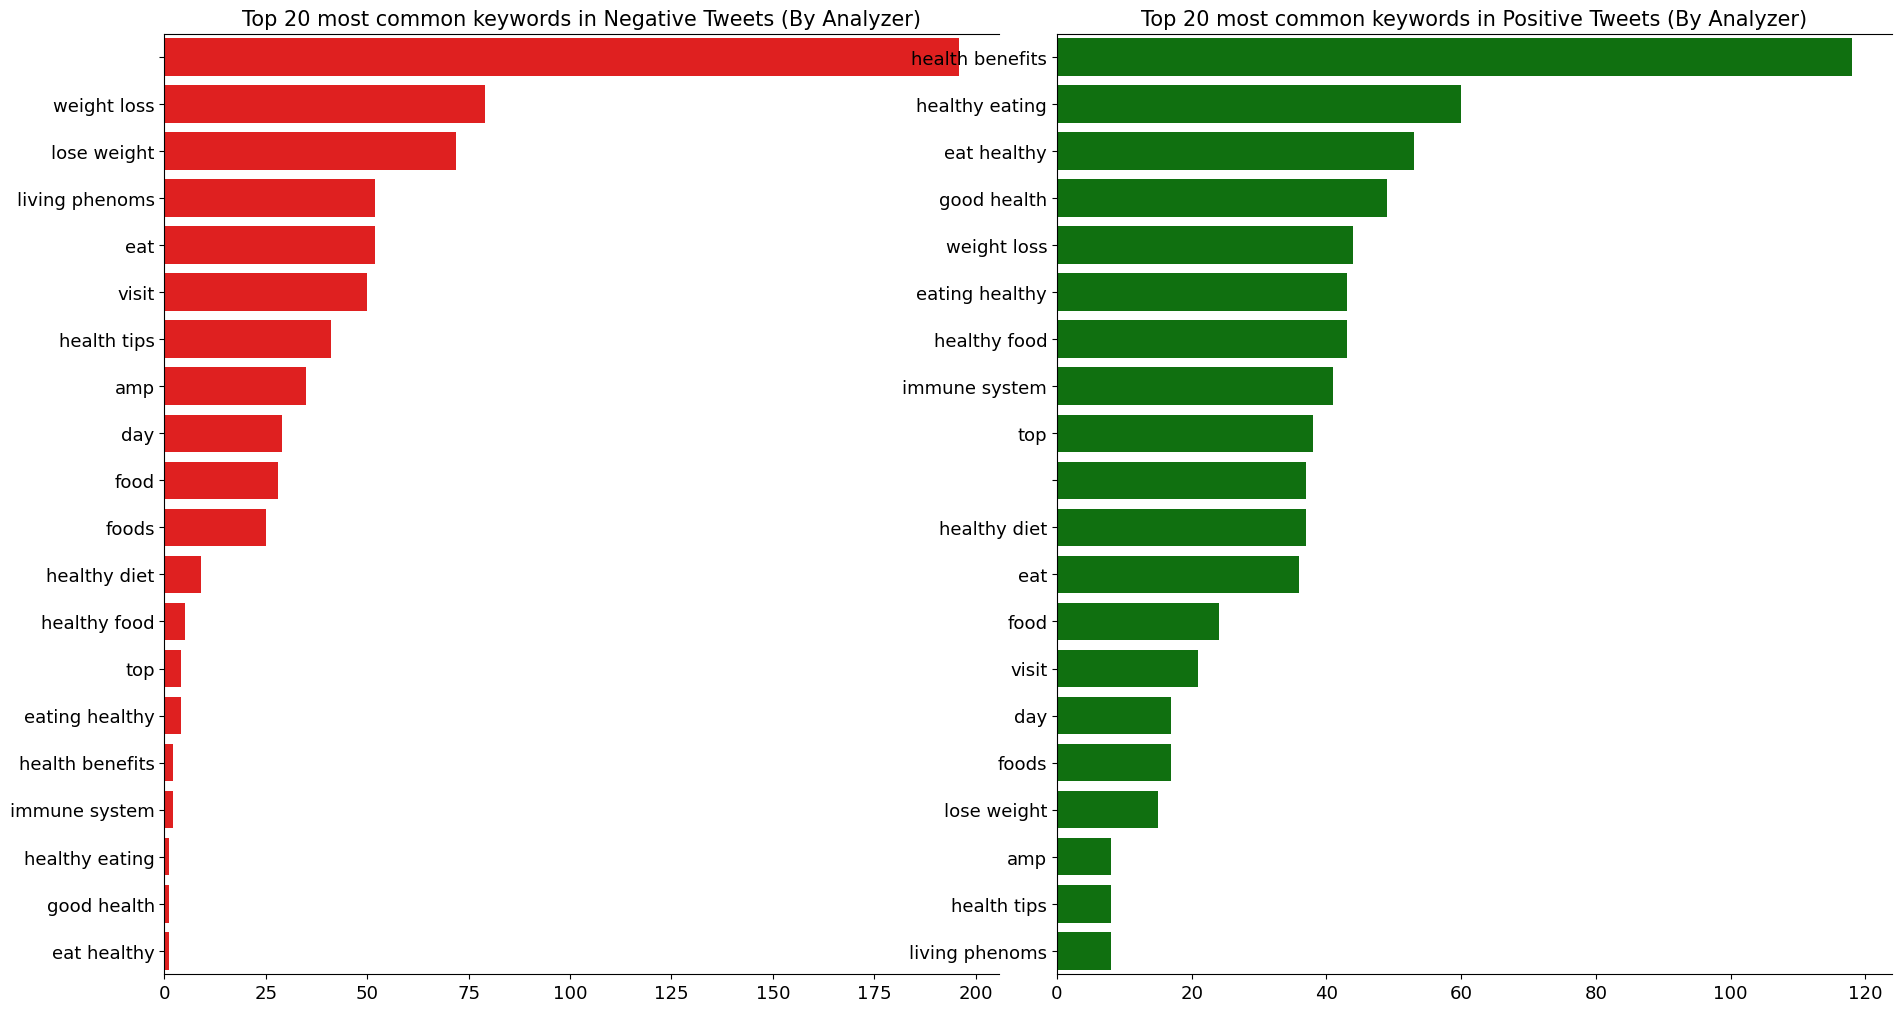

In [171]:
N = 20
top_keywords = df3['keyword_2'].value_counts()[:N].index.tolist()

label_1 = df3[df3['label'] == 1]['keyword_2'].value_counts()
label_1 = label_1[label_1.index.isin(top_keywords)]
label_1_unigrams = pd.DataFrame({'keyword_2': label_1.index, 'count':label_1.values})

label_0 = df3[df3['label'] == 0]['keyword_2'].value_counts()
label_0 = label_0[label_0.index.isin(top_keywords)]
label_0_unigrams = pd.DataFrame({'keyword_2': label_0.index, 'count': label_0.values})

fig, axes = plt.subplots(ncols=2, figsize=(18, 10), dpi=100)
plt.tight_layout()

sns.barplot(y=label_0_unigrams['keyword_2'], x=label_0_unigrams['count'], ax=axes[0], color='red')
sns.barplot(y=label_1_unigrams['keyword_2'], x=label_1_unigrams['count'], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common keywords in Negative Tweets (By Analyzer)', fontsize=15)
axes[1].set_title(f'Top {N} most common keywords in Positive Tweets (By Analyzer)', fontsize=15)

plt.show()


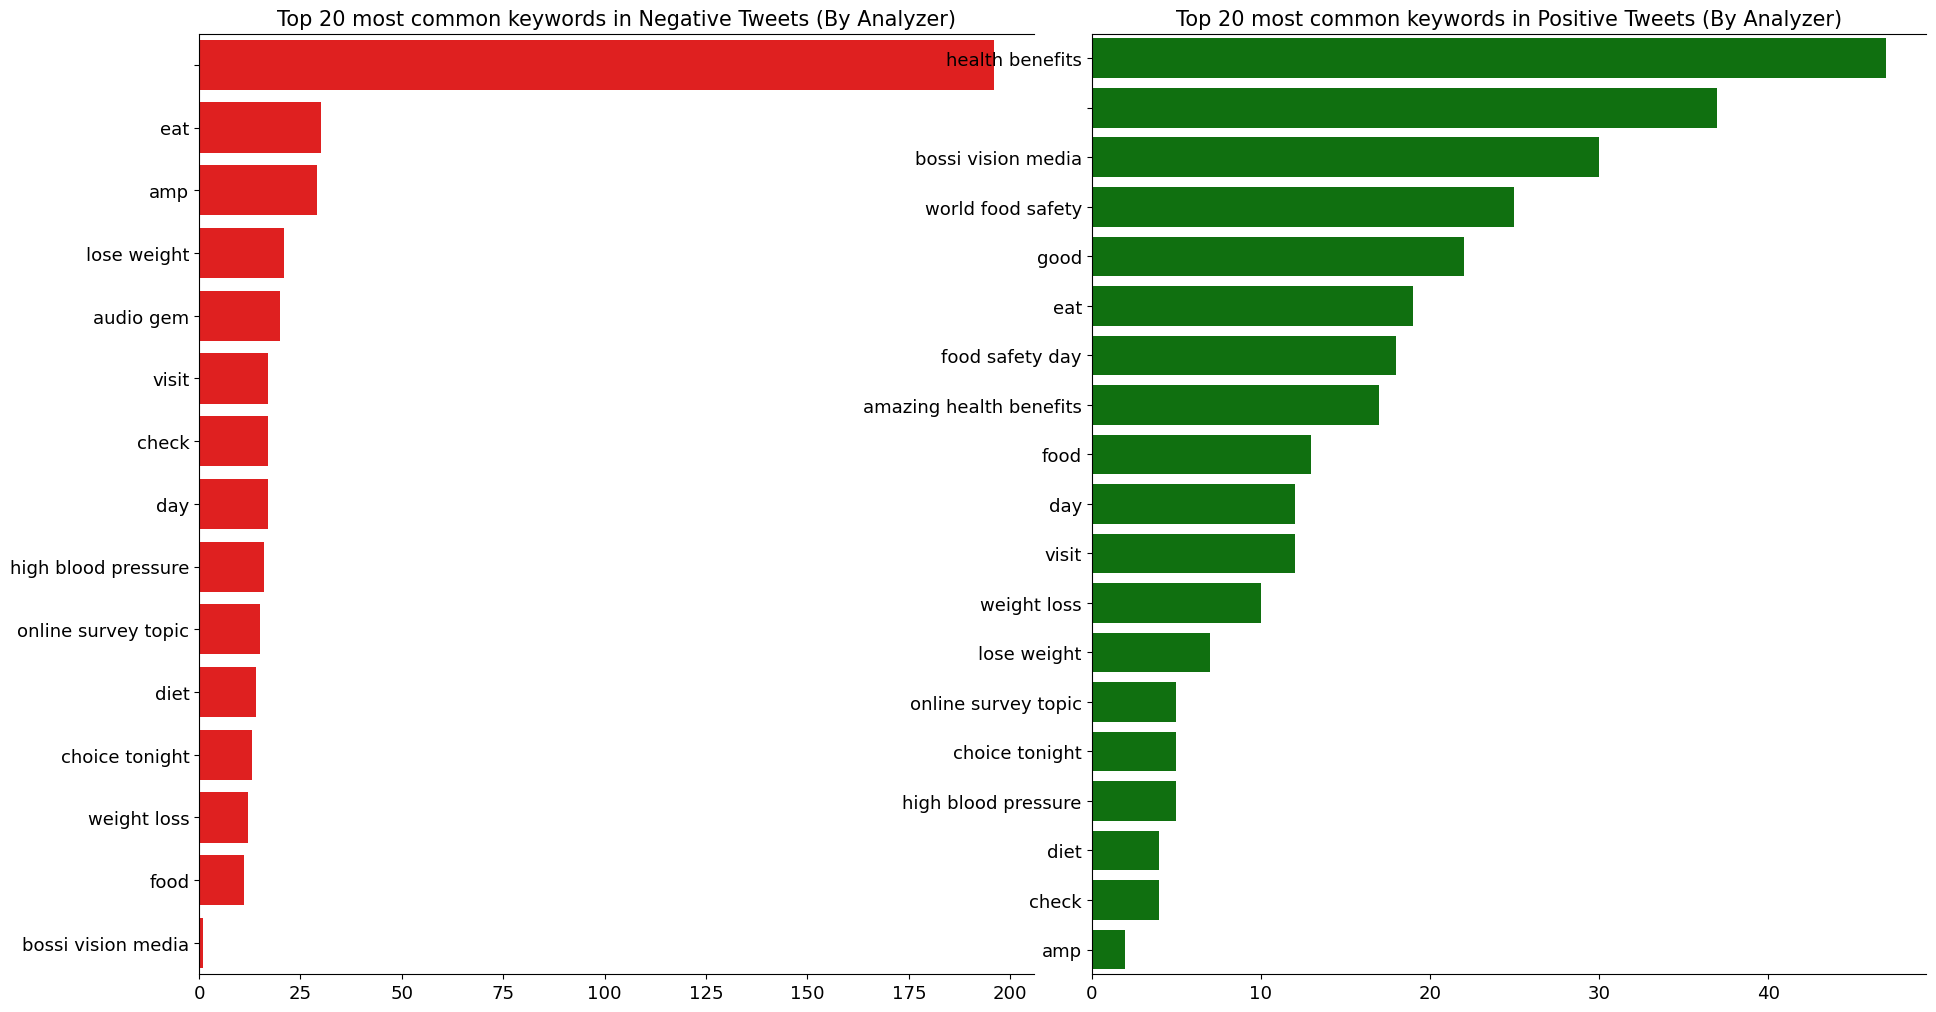

In [162]:
N = 20
top_keywords = df3['keyword_3'].value_counts()[:N].index.tolist()

label_1 = df3[df3['label'] == 1]['keyword_3'].value_counts()
label_1 = label_1[label_1.index.isin(top_keywords)]
label_1_unigrams = pd.DataFrame({'keyword_3': label_1.index, 'count':label_1.values})

label_0 = df3[df3['label'] == 0]['keyword_3'].value_counts()
label_0 = label_0[label_0.index.isin(top_keywords)]
label_0_unigrams = pd.DataFrame({'keyword_3': label_0.index, 'count': label_0.values})

fig, axes = plt.subplots(ncols=2, figsize=(18, 10), dpi=100)
plt.tight_layout()

sns.barplot(y=label_0_unigrams['keyword_3'], x=label_0_unigrams['count'], ax=axes[0], color='red')
sns.barplot(y=label_1_unigrams['keyword_3'], x=label_1_unigrams['count'], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common keywords in Negative Tweets (By Analyzer)', fontsize=15)
axes[1].set_title(f'Top {N} most common keywords in Positive Tweets (By Analyzer)', fontsize=15)

plt.show()


- Note: Ignore the empty space keyword as these rows leave empty by Yake algorithm, where there was no prominent keyword.

##### 10 Tweets Text related to 'healthy' Keyword (Unigram)

In [163]:
# assuming your DataFrame is named 'df'
df_filtered = df3.loc[(df3['label'] == 1) & (df3['keyword_1'] == 'healthy')].head(10)

# print the ten rows from the 'Text' column
for text in df_filtered['Text']:
    print(text)


to our healthy eating blog post  we know how much you liked this one so weve decided to touch on healthy eating again
rt    the importance of eating healthy
healthy diet without rice
in order to build resistance to viruses it is important to detox the body with some beverages that are easy to make and can be enjoyed at all times here are some drinks that will help you remain healthy
healthy nuts and seeds you must eat everyday
i used to post healthy food and an old friend of mine said thats too healthy for me
healthy snack  

2 bananas sliced
cinnamon
chopped pecans 
honey 
peanut butter
whipped cream
do you want a healthy chicken salad heres a recipe idea and the health benefits it can actually give you
with covids third wave literally knocking at our doors we need to strengthen our immunity good nutrition means good health create healthy amp tasty meal plans with amiyaa eat healthy amp stay healthy always
    

follow
the first ebook was such a success that i had the honor of teaming

##### 10 Tweets Text related to 'health benefits' Keyword (Bigram)

In [164]:
# assuming your DataFrame is named 'df'
df_filtered = df3.loc[(df3['label'] == 1) & (df3['keyword_2'] == 'health benefits')].head(10)

# print the ten rows from the 'Text' column
for text in df_filtered['Text']:
    print(text)


if youve decided to become a vegetarian here are the top 5 health benefits associated with plantforward eating
what are the health benefits of apples
what are the health benefits of turmeric read more here
20 health benefits of drinking coffee that you must know
bottle gourd  calabash  health benefits  9 reasons to eat gourd  foo  via
5 health benefits of kratom by jessica smith
5 health benefits of cherries
health benefits of kiwi
aids sleep and is rich in serotonin
7 health benefits of lemons
health benefits credited to probiotics are mostly related to your digestive system some of these benefits have either direct or indirect effect on your weight


##### 10 Tweets Text related to 'amazing health benefits' Keyword (Trigram)

In [169]:
# assuming your DataFrame is named 'df'
df_filtered = df3.loc[(df4['label'] == 1) & (df3['keyword_3'] == 'amazing health benefits')].head(10)

# print the ten rows from the 'Text' column
for text in df_filtered['Text']:
    print(text)


excellent source of vitamin c
very good source of vitamin a
good source of potassium and magnesium
trace amounts of vitamin k and pantothenic acid
yes it is 92 water but that the other 8 is filled with good nutrition and amazing health benefits
10 amazing health benefits of doing salt water gargle
amazing health benefits of turmeric that you should know
amazing health benefits to sleep without underwear in men and women
amazing health benefits of squids
16 amazing health benefits of sunflower seeds  via
arent just great to add flavour and heat to bland food but have some amazing health benefits too

boh is the secret of our energy
10 amazing health benefits of yogurt
13 amazing health benefits of amla murabba
reasons to eat more dark chocolate
the amazing health benefits


#### Sentiment Analysis Using Naïve Bayes

In [170]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df3['Text'], df3['label'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)

# Train the model using cross-validation
model = MultinomialNB()
scores = cross_val_score(model, X_train_vectorized, y_train, cv=5)
print(f"Cross-validation accuracy scores: {scores}")
print(f"Mean cross-validation accuracy: {scores.mean()}")

# Fit the model on the full training set
model.fit(X_train_vectorized, y_train)

# Vectorize and predict on the testing data
X_test_vectorized = vectorizer.transform(X_test)
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")


Cross-validation accuracy scores: [0.76580004 0.77171845 0.76067653 0.77124736 0.77272727]
Mean cross-validation accuracy: 0.7684339315646922
Accuracy: 0.7576526297987485
Precision: 0.7164556962025317
Recall: 0.9393482196741099
F1 score: 0.8128998563781173


- In conclusion, sentiment analysis of health-related tweets has the potential to provide valuable insights into people's perceptions and attitudes towards healthy lifestyles, disease prevention, and healthcare practices. The analysis of health tweets can help health professionals and policymakers to develop better public health campaigns, improve health communication strategies, and enhance health literacy.

- Moreover, social media platforms can be used as a tool for health promotion, encouraging individuals to engage in healthy behaviors, and providing support and information for those struggling with health-related issues.

- Therefore, it is recommended that health professionals and policymakers should actively engage with social media platforms, monitor health-related conversations, and use sentiment analysis to gain a deeper understanding of people's health perceptions and needs. Additionally, they should use these insights to develop targeted interventions that address the specific needs and concerns of different population groups. Overall, the analysis of health tweets can be an effective tool for promoting health, preventing diseases, and improving healthcare outcomes.